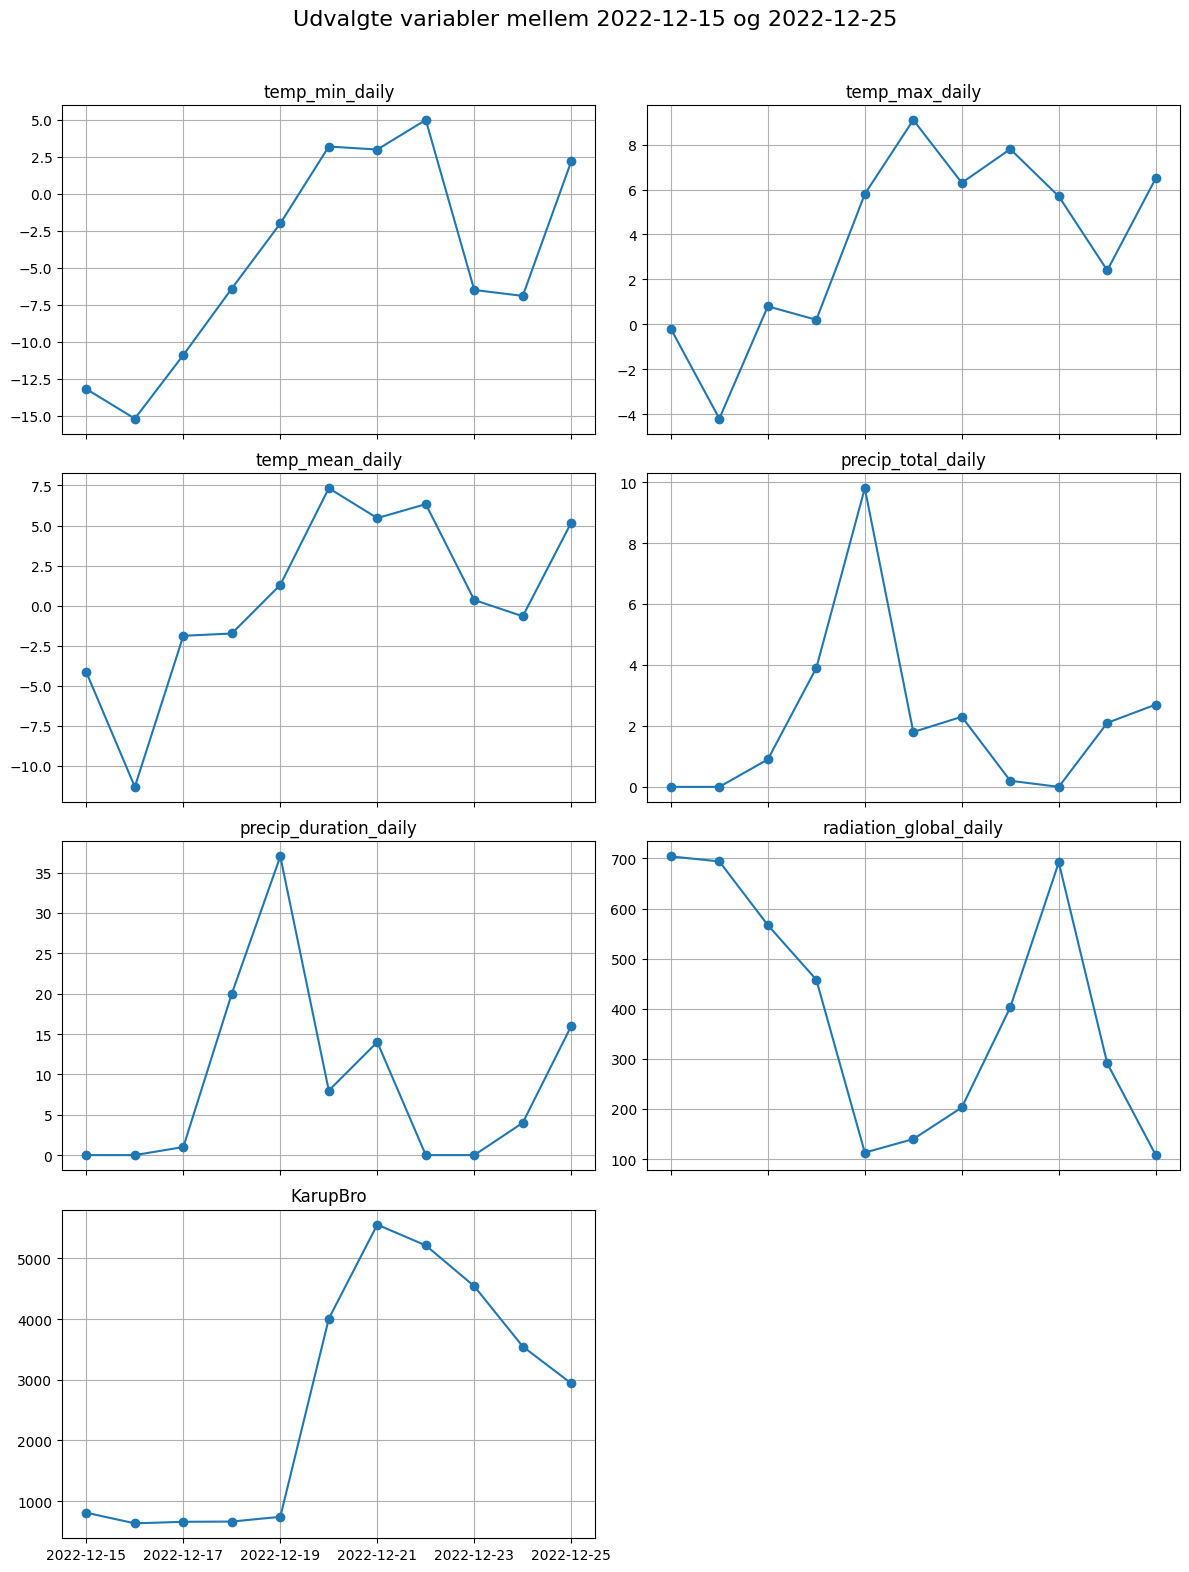

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Paths (samme som i dit oprindelige script)
DATA_PATH          = '/Users/nicolaigarderhansen/Desktop/Bachelorprojekt/Forecasting-water-inflow/Data loading and handling/Cleaned data etc./data_cleaned_and_interpolated.csv'
VANDSTAND_PATH     = '/Users/nicolaigarderhansen/Desktop/Bachelorprojekt/Forecasting-water-inflow/Data loading and handling/Raw data/28.02_Vandstand (DMP)_Dag.csv'

# Config
date_col   = 'time'
# Vi inkluderer nu kun de ønskede kolonner + 'KarupBro'
plot_cols = [
    'temp_min_daily',
    'temp_max_daily',
    'temp_mean_daily',
    'precip_total_daily',
    'precip_duration_daily',
    'radiation_global_daily',
    'KarupBro'
]

# 1) Load cleaned & interpolated data
df = pd.read_csv(DATA_PATH, parse_dates=[date_col])
df.sort_values(date_col, inplace=True)
df.set_index(date_col, inplace=True)

# 2) Funktion til at loade daglige vandstandstal (hvis du stadig skal bruge dem til noget senere)
def load_daily_vandstand(path):
    with open(path, encoding='latin1') as f:
        for i, line in enumerate(f):
            if line.strip().startswith('Dato (DK normaltid)'):
                header_row = i
                break

    vand = pd.read_csv(
        path,
        sep=';',
        skiprows=header_row,
        header=0,
        usecols=[0, 1],
        encoding='latin1',
        engine='python'
    )
    vand.columns = ['date', 'water_level']
    vand['date'] = pd.to_datetime(vand['date'], dayfirst=True)
    vand.set_index('date', inplace=True)
    return vand

# 3) Load og merge vandstand (valgfrit, da vi ikke plotter vandstand her)
vand_df = load_daily_vandstand(VANDSTAND_PATH)
df = df.join(vand_df['water_level'], how='left')

# 4) Filtrer tidsrække mellem 2022-12-15 og 2022-12-25
start, end = '2022-12-15', '2022-12-25'
df_subset = df.loc[start:end]

# 5) Plot kun de ønskede kolonner
n = len(plot_cols)
ncols = 2
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4*nrows), sharex=True)
axes = axes.flatten()

for i, col in enumerate(plot_cols):
    axes[i].plot(df_subset.index, df_subset[col], marker='o', linestyle='-')
    axes[i].set_title(col)
    axes[i].grid(True)

# Fjern eventuelle tomme akser
for j in range(n, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(top=0.92)
fig.suptitle(f'Udvalgte variabler mellem {start} og {end}', fontsize=16)
plt.show()

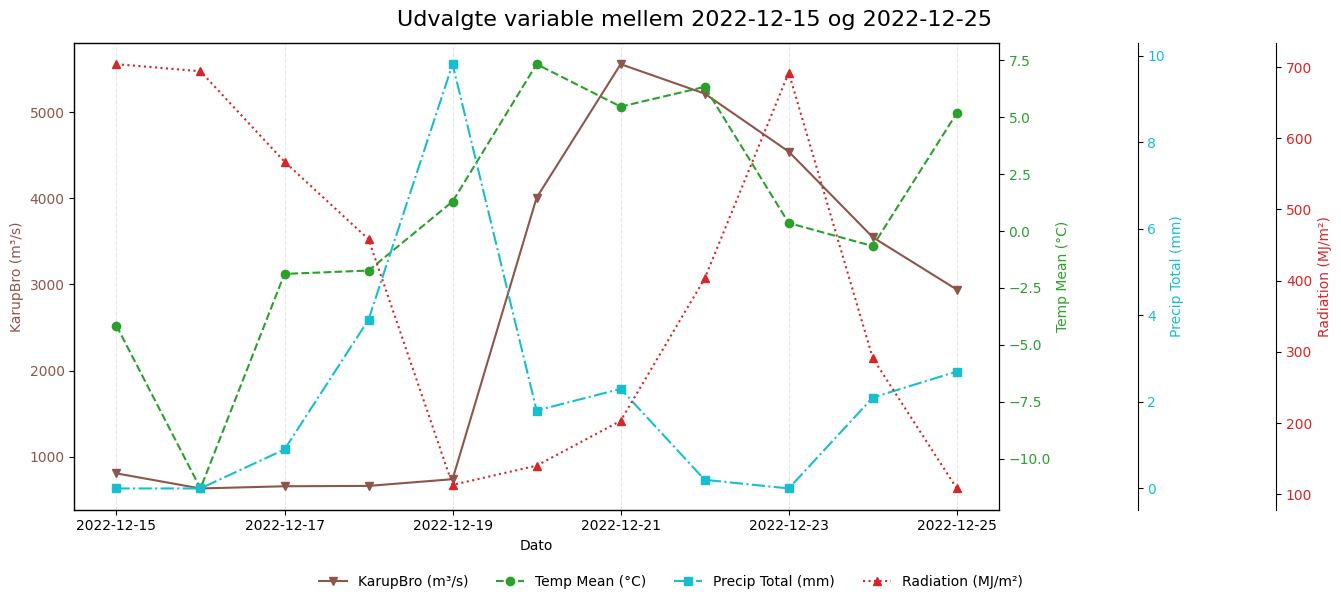

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 1) Load data
# ---------------------------------------------------
DATA_PATH      = '/Users/nicolaigarderhansen/Desktop/Bachelorprojekt/Forecasting-water-inflow/Data loading and handling/Cleaned data etc./data_cleaned_and_interpolated.csv'
VANDSTAND_PATH = '/Users/nicolaigarderhansen/Desktop/Bachelorprojekt/Forecasting-water-inflow/Data loading and handling/Raw data/28.02_Vandstand (DMP)_Dag.csv'

date_col = 'time'
# Vi reducerer til kun de ønskede kolonner
plot_cols = [
    'temp_mean_daily',
    'precip_total_daily',
    'radiation_global_daily',
    'KarupBro'
]

# Load det rensede datasæt
df = pd.read_csv(DATA_PATH, parse_dates=[date_col])
df.sort_values(date_col, inplace=True)
df.set_index(date_col, inplace=True)

# Hvis du vil bruge vandstand senere (vi bruger ikke her), men vi henter KarupBro fra df
def load_daily_vandstand(path):
    with open(path, encoding='latin1') as f:
        for i, line in enumerate(f):
            if line.strip().startswith('Dato (DK normaltid)'):
                header_row = i
                break

    vand = pd.read_csv(
        path,
        sep=';',
        skiprows=header_row,
        header=0,
        usecols=[0, 1],
        encoding='latin1',
        engine='python'
    )
    vand.columns = ['date', 'water_level']
    vand['date'] = pd.to_datetime(vand['date'], dayfirst=True)
    vand.set_index('date', inplace=True)
    return vand

vand_df = load_daily_vandstand(VANDSTAND_PATH)
df = df.join(vand_df['water_level'], how='left')

# ---------------------------------------------------
# 2) Subset i det ønskede interval
# ---------------------------------------------------
start, end = '2022-12-15', '2022-12-25'
df_subset = df.loc[start:end, plot_cols]

# ---------------------------------------------------
# 3) Plot med KarupBro som primær akse (venstre), og én akse pr. øvrig variabel
# ---------------------------------------------------
fig, ax1 = plt.subplots(figsize=(14, 6))

# Primær akse (venstre) – KarupBro (m³/s)
ax1.plot(
    df_subset.index,
    df_subset['KarupBro'],
    label='KarupBro (m³/s)',
    color='tab:brown',
    marker='v',
    linestyle='-'
)
ax1.set_ylabel('KarupBro (m³/s)', color='tab:brown')
ax1.tick_params(axis='y', labelcolor='tab:brown')
ax1.grid(axis='x', linestyle='--', alpha=0.3)

# 2. akse (højre) – temp_mean_daily (°C)
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.00))
ax2.plot(
    df_subset.index,
    df_subset['temp_mean_daily'],
    label='Temp Mean (°C)',
    color='tab:green',
    marker='o',
    linestyle='--'
)
ax2.set_ylabel('Temp Mean (°C)', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# 3. akse (yderst til højre) – precip_total_daily (mm)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('axes', 1.15))
ax3.plot(
    df_subset.index,
    df_subset['precip_total_daily'],
    label='Precip Total (mm)',
    color='tab:cyan',
    marker='s',
    linestyle='-.'
)
ax3.set_ylabel('Precip Total (mm)', color='tab:cyan')
ax3.tick_params(axis='y', labelcolor='tab:cyan')

# 4. akse (yderst til højre, forskudt endnu længere) – radiation_global_daily (MJ/m²)
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('axes', 1.30))
ax4.plot(
    df_subset.index,
    df_subset['radiation_global_daily'],
    label='Radiation (MJ/m²)',
    color='tab:red',
    marker='^',
    linestyle=':'
)
ax4.set_ylabel('Radiation (MJ/m²)', color='tab:red')
ax4.tick_params(axis='y', labelcolor='tab:red')

# ---------------------------------------------------
# 4) Sammensæt en fælles legend i bunden
# ---------------------------------------------------
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines_3, labels_3 = ax3.get_legend_handles_labels()
lines_4, labels_4 = ax4.get_legend_handles_labels()

all_lines  = lines_1 + lines_2 + lines_3 + lines_4
all_labels = labels_1 + labels_2 + labels_3 + labels_4

fig.legend(
    all_lines,
    all_labels,
    loc='lower center',
    ncol=4,
    frameon=False
)

# ---------------------------------------------------
# 5) Justér layout og vis plot
# ---------------------------------------------------
ax1.set_xlabel('Dato')
fig.tight_layout(rect=[0, 0.05, 1, 0.95])
fig.suptitle(f'Udvalgte variable mellem {start} og {end}', fontsize=16)
plt.show()
